In [33]:
import pandas as pd

from google.colab import files
uploaded = files.upload()
import io

df = pd.read_csv(('Pharmaceuticals.csv'), index_col=0)
df.count()

Saving Pharmaceuticals.csv to Pharmaceuticals (1).csv


Name                     21
Market_Cap               21
Beta                     21
PE_Ratio                 21
ROE                      21
ROA                      21
Asset_Turnover           21
Leverage                 21
Rev_Growth               21
Net_Profit_Margin        21
Median_Recommendation    21
Location                 21
Exchange                 21
dtype: int64


(A).Using the numerical variables (1 to 9) for clustering the 21 firms. Justifying the various choices made in conducting the cluster analysis, such as weights for different variables, the specific clustering algorithm(s) used, the number of clusters formed, and so on.

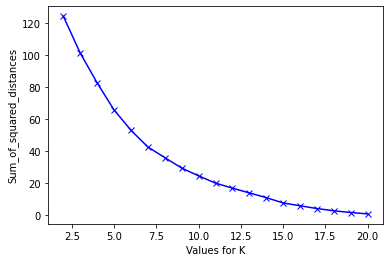

In [35]:
#Collecting quantitative variables (1-9) for clustering the 21 firms
df.head()
#Pharma_data = df[]
col_val=[i for i in range(1,10)]
col_val
Pharma_data = df[df.columns[col_val]]
Pharma_data.count()
#Scaling all the quantitative variables in the dataframe.
from sklearn import preprocessing
Pharma_data_Norm = Pharma_data.apply(preprocessing.scale, axis=0)
#Comment: Choosing the value of (k)
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
for i in range(2,len(Pharma_data_Norm.index)):
  km = KMeans(n_clusters=i,init ='k-means++', max_iter=400, n_init=10,random_state=0 )
  km = km.fit(Pharma_data_Norm)
  Sum_of_squared_distances.append(km.inertia_)
K_values= range(2,len(Pharma_data_Norm.index))
plt.plot(K_values, Sum_of_squared_distances, 'bx-')
plt.xlabel('Values for K')
plt.ylabel('Sum_of_squared_distances')
plt.show()

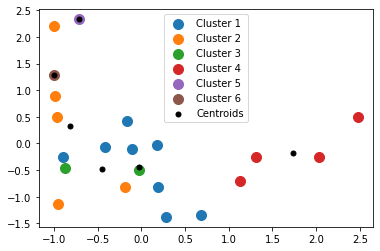

In [36]:
#K-Means Cluster Analysis - Fitting the data within 6 clusters
import numpy as np
means=KMeans(n_clusters=6,init ='k-means++', max_iter=400, n_init=10,random_state=0 )
datafit = means.fit_predict(Pharma_data_Norm)
import pandas as pd
Pharma_data_Norm["Cluster"]= (datafit)
N_data=Pharma_data_Norm.values
import matplotlib.pyplot as plt
#6 Visualising all the clusters
for i in range(6):
    plt.scatter(N_data[datafit==i, 0], N_data[datafit==i, 1],s=100, label =('Cluster '+str(i+1)))
plt.scatter(means.cluster_centers_[:, 0], means.cluster_centers_[:, 1], s=25, c='black', label = 'Centroids')
plt.legend()
plt.show()

(B) Interpreting the clusters according to the numerical variables used in the formation of the clusters.

In [37]:
Data= Pharma_data_Norm.groupby('Cluster')
Data=Data.groups
#Showing each index as per the cluster
for i in Data:
  print('Cluster'+str(i+1)+':'+str(Data[i]))
#Analyzing each cluster individually  
Data= Pharma_data_Norm.groupby('Cluster').agg('mean')
Data

Cluster1:Index(['ABT', 'AHM', 'AZN', 'BMY', 'LLY', 'NVS', 'SGP', 'WYE'], dtype='object', name='Symbol')
Cluster2:Index(['AVE', 'ELN', 'IVX', 'MRX', 'WPI'], dtype='object', name='Symbol')
Cluster3:Index(['AGN', 'PHA'], dtype='object', name='Symbol')
Cluster4:Index(['GSK', 'JNJ', 'MRK', 'PFE'], dtype='object', name='Symbol')
Cluster5:Index(['BAY'], dtype='object', name='Symbol')
Cluster6:Index(['CHTT'], dtype='object', name='Symbol')


,Market_Cap,Beta,PE_Ratio,ROE,ROA,Asset_Turnover,Leverage,Rev_Growth,Net_Profit_Margin
Cluster,,,,,,,,,
0,-0.032198,-0.446868,-0.325083,0.199863,0.418477,0.177246,-0.281272,-0.721541,0.570708
1,-0.815718,0.328416,-0.461257,-0.669448,-0.807657,-1.134376,0.278415,1.255886,-0.152288
2,-0.450099,-0.481791,2.766702,-0.855572,-0.946301,0.236328,-0.145203,-0.119731,-1.451496
3,1.737454,-0.182453,-0.203359,1.265486,1.383690,1.181641,-0.479637,0.478716,0.605843
4,-0.712554,2.331983,0.153174,-1.487304,-1.755058,-0.472657,-0.768169,-1.534116,-2.044884
5,-1.000888,1.294279,0.033806,-0.115154,-1.196630,-0.472657,3.835226,-0.648387,-1.279725


Answer: The lowest leverage,lowest ROA, lowest Net Profit Margin, lowest Rev Growth, Highest Beta : Cluster 5
The highest PE ratio, lowest ROE , lowest Beta: Cluster 3
The lowest Asset Turnover,lowest PE Ratio, Highest Rev Growth : Cluster 2
The highest Market Cap,highest ROE, highest ROA,highest Asset Turnover,highest net profit margin : Cluster 4
The highest Leverage, lowest market cap: Cluster 6


---



(C) Governing about the pattern in the clusters with respect to the numerical variables (10 to 12):
Answer: In terms of Media Recommendation Component, there is a trend in the clusters. 
Cluster 4: Recommendations with the highest Net Profit Margin, lowest Beta, lowest PE Ratio, and lowest Rev Growth. 
Cluster 3 : the most powerful. Cluster 3 is mainly made up of buy recommendations, with one in particular standing out.
Cluster 2 : the highest PE ratio, lowest ROE, lowest ROA, lowest Asset Turnover, and lowest Net Profit Margin, with mainly Hold recommendations.


(D)Providing appropriate names for each cluster using any or all of the variables in the dataset.
Answer: Based on the quantitative variable dependency, different clusters can be defined. As can be seen in the scatter plot above. 
Cluster 2 - The lowest Asset Turnover,lowest PE Ratio, Highest Rev Growth
Cluster 3 - The highest PE ratio, lowest ROE , lowest Beta
Cluster 4 - The highest Market Cap,highest ROE, highest ROA,highest Asset Turnover,highest net profit margin
Cluster 5 - The lowest leverage,lowest ROA, lowest Net Profit Margin, lowest Rev Growth, Highest Beta
Cluster 6 - The highest Leverage, lowest market cap